In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/캡스톤/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/캡스톤


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# matplot color display
def show_with_matplotlib(img, title):
    """Shows an image using matplotlib capabilities"""
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()
  
def show_with_matplotlib_gray(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img is None:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

In [ ]:
def flood_fill(img, x, y):
  flood = img.copy()
  seed = (x, y)
  cv2.floodFill(flood, None, seedPoint=seed, newVal=(255, 255, 255), loDiff=(12, 12, 12, 12), upDiff=(12, 12, 12, 12))

  return flood

In [ ]:
def kmeans_color_quantization(image, clusters=2, rounds=1): #글씨 색도 흐릿해지는 게 문제
    h, w = image.shape[:2]
    samples = np.zeros([h*w,3], dtype=np.float32)
    
    count = 0
    for x in range(h):
        for y in range(w):
            samples[count] = image[x][y]
            count += 1

    compactness, labels, centers = cv2.kmeans(samples,
            clusters, 
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
            attempts = rounds, 
            flags = cv2.KMEANS_PP_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]

    return res.reshape((image.shape))

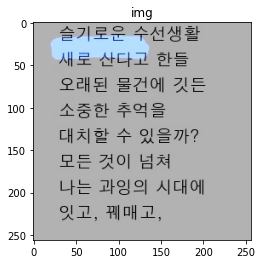

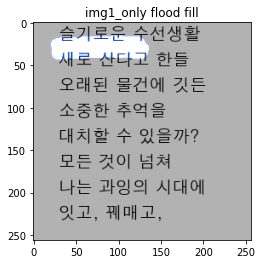

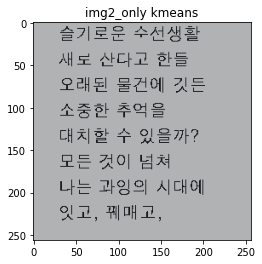

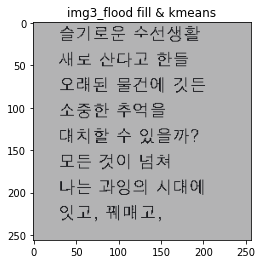

[180 179 179]


In [ ]:
image_path1 = "2.jpg"
img = cv2.imread(image_path1)
show_with_matplotlib(img, "img")

#75, 115
img1 = img.copy()

img1 = flood_fill(img1, 69, 33)

'''
img1 = flood_fill(img1, 125, 62)
img1 = flood_fill(img1, 50, 108)
img1 = flood_fill(img1, 90, 76)
img1 = flood_fill(img1, 77, 124)
img1 = flood_fill(img1, 55, 180)
img1 = flood_fill(img1, 70, 212)
img1 = flood_fill(img1, 145, 191)
img1 = flood_fill(img1, 124, 219)
img1 = flood_fill(img1, 32, 168)
'''

show_with_matplotlib(img1, "img1_only flood fill")

img2 = img.copy()
kmeans = kmeans_color_quantization(img2, clusters=2)
res = kmeans.copy()
show_with_matplotlib(res, "img2_only kmeans")

img3 = img1.copy()
kmeans = kmeans_color_quantization(img3, clusters=2)
res = kmeans.copy()
show_with_matplotlib(res, "img3_flood fill & kmeans")

print(res[115, 75])